PCA 

In [1]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.cm as cm
digits = load_digits()
data = digits.data
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

In [2]:
pca = PCA(n_components=10)
data_r = pca.fit(data).transform(data)
print('explained variance ratio (first two components): %s' %
str(pca.explained_variance_ratio_))
print('sum of explained variance (first two components): %s' %
str(sum(pca.explained_variance_ratio_)))

explained variance ratio (first two components): [0.14890594 0.13618771 0.11794594 0.08409979 0.05782413 0.04916909
 0.04315986 0.03661372 0.03353241 0.03078759]
sum of explained variance (first two components): 0.7382261854861066


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

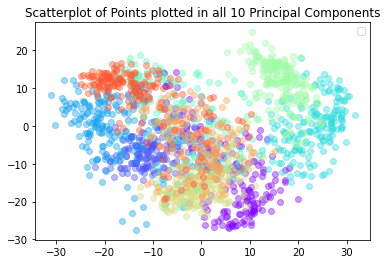

In [3]:
X = np.arange(10)
ys = [i+X[i]+(i*X[i])**2 for i in range(10)]
plt.figure()
colors = cm.rainbow(np.linspace(0, 1, len(ys)))

for c, i, target_name in zip(colors, [1,2,3,4,5,6,7,8,9,10], labels):
    plt.scatter(data_r[labels == i, 0], data_r[labels == i, 1], c=c, alpha = 0.4)
plt.legend()
plt.title('Scatterplot of Points plotted in all 10 Principal Components')
plt.show()

Clustering

In [4]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

np.random.seed()

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target
sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
% (n_digits, n_samples, n_features))
print(79 * '_')
print('% 9s' % 'init'' time inertia homo compl v-meas ARI AMI silhouette')


n_digits: 10, 	 n_samples 1797, 	 n_features 64
_______________________________________________________________________________
init time inertia homo compl v-meas ARI AMI silhouette


In [30]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [31]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.089s	69662	0.680	0.719	0.699	0.570	0.695	0.182
random   	0.041s	69707	0.675	0.716	0.694	0.560	0.691	0.192
PCA-based	0.017s	72686	0.636	0.658	0.647	0.521	0.643	0.150
__________________________________________________________________________________


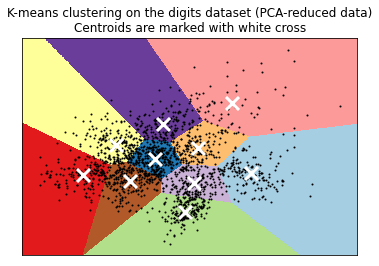

In [55]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

h = 0.02  

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


Elbow graph

In [27]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

K = range(1,21)
explainedvariance= []

In [28]:
for k in K:
    reduced_data = PCA(n_components=2).fit_transform(data)
    kmeans = KMeans(init = 'k-means++', n_clusters = k, n_init = k)
    kmeans.fit(reduced_data)
    explainedvariance.append(sum(np.min(cdist(reduced_data, kmeans.cluster_centers_, 'euclidean'), axis = 1))/data.shape[0])

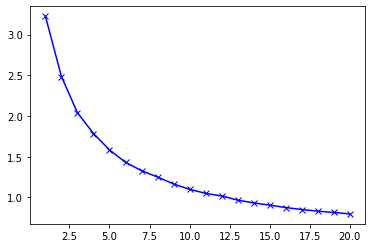

In [29]:
plt.plot(K, explainedvariance, 'bx-')
plt.show()

Self-organizing maps

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 5.000000 , radius_final: 1.000000, trainlen: 4

 epoch: 1 ---> elapsed time:  0.014000, quantization error: 32.704891

 epoch: 2 ---> elapsed time:  0.014000, quantization error: 7.092200

 epoch: 3 ---> elapsed time:  0.015000, quantization error: 6.616231

 epoch: 4 ---> elapsed time:  0.016000, quantization error: 5.928307

 Finetune training...
 radius_ini: 1.250000 , radius_final: 1.000000, trainlen: 6

 epoch: 1 ---> elapsed time:  0.015000, quantization error: 5.038481

 epoch: 2 ---> elapsed time:  0.014000, quantization error: 4.924283

 epoch: 3 ---> elapsed time:  0.014000, quantization error: 4.799759

 epoch: 4 ---> elapsed time:  0.015000, quantization error: 4.724563

 epoch: 5 ---> elapsed time:  0.015000, quantization error: 4.656892

 epoch: 6 ---> elapsed time:  0.014000, quantization error: 4.596983

 Final quantization error: 4.596983
 train took: 0.163000 seconds


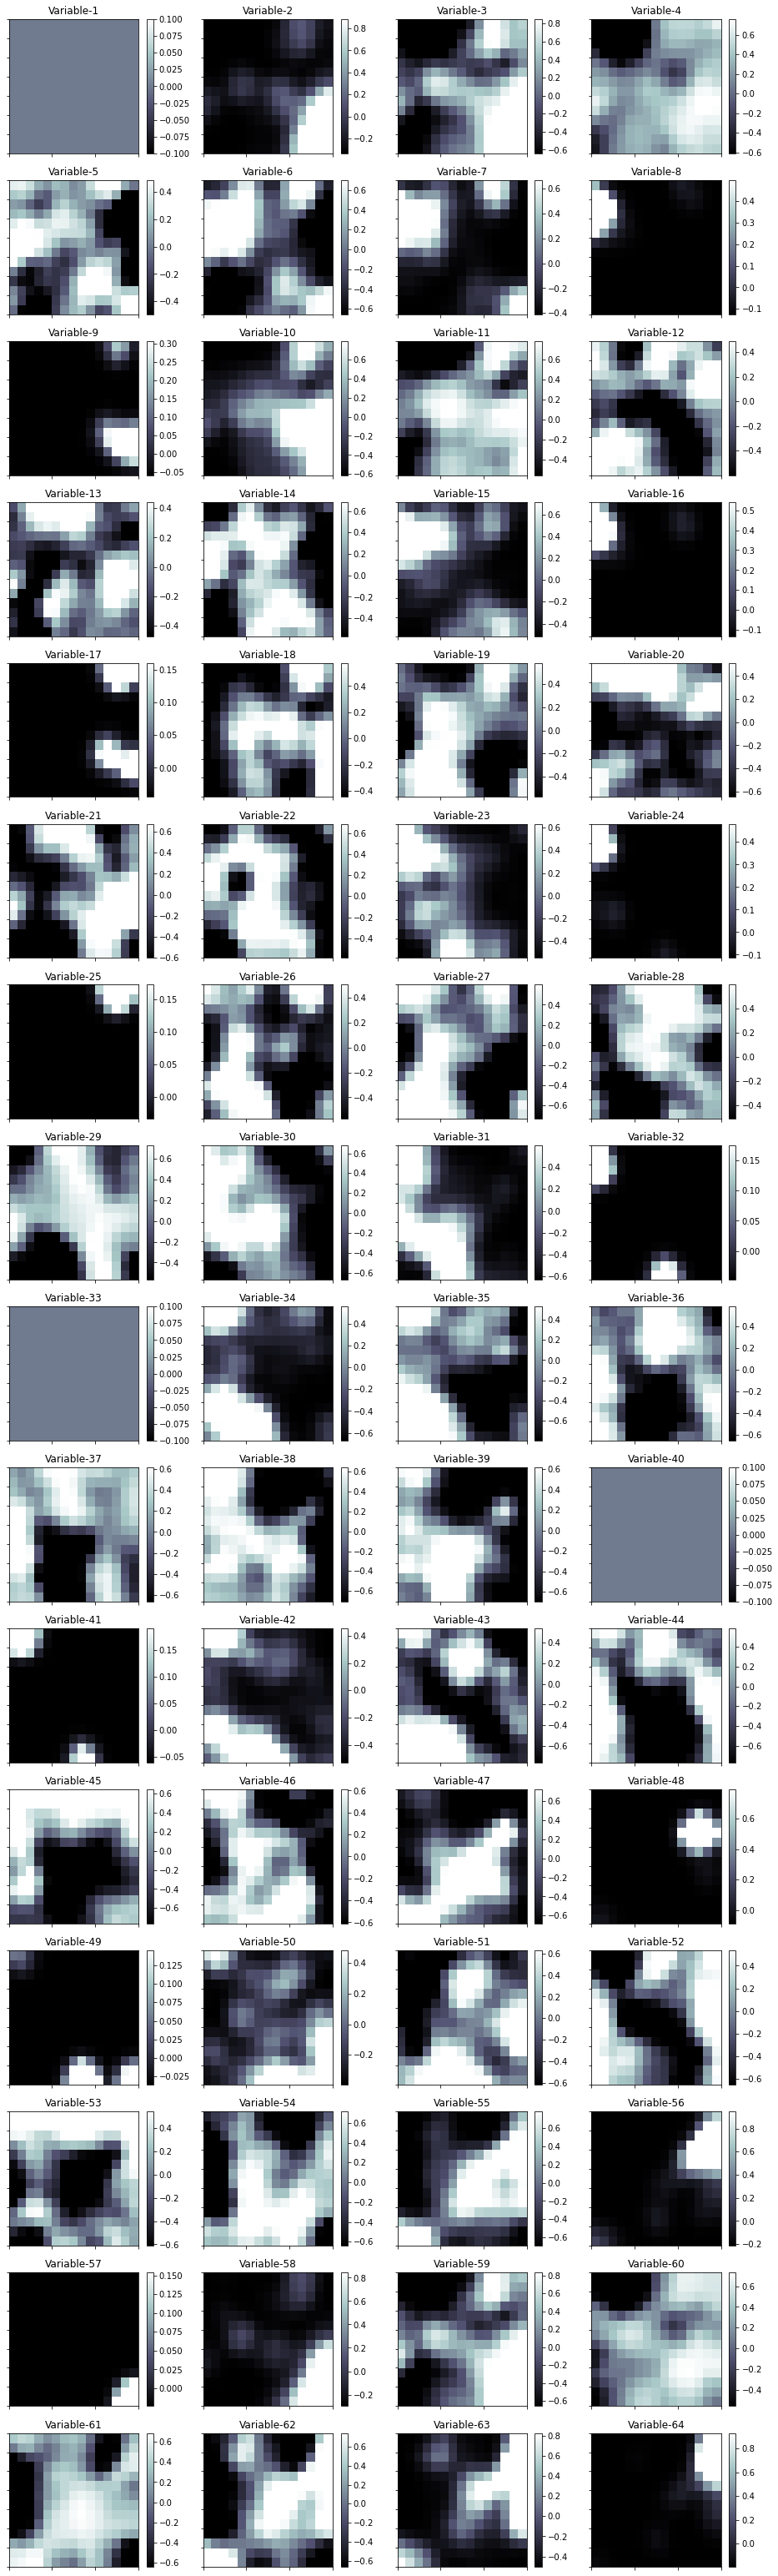

In [28]:
import numpy as np
from sklearn.datasets import load_digits


digits = load_digits()
data = digits.data

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib
from sompy.sompy import SOMFactory as SOM


som = SOM.build(data, normalization = 'var', initialization='random')
som.train()

from sompy.visualization.mapview import View2D
view2D  = View2D(50,50,"rand data",text_size=10)
view2D.show(som, col_sz=4, which_dim="all")


